<link rel='stylesheet' href='../assets/css/main.css'/>

[<< back to main index](../README.md)

# Linear Regression in using Keras 

### Overview
Instructor to demo this on screen.
 
### Builds on
None

### Run time
approx. 20-30 minutes

### Notes

We can do linear regression with ordinary. 

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt


## Example : Tips
Here is our tip data.  This shows 10 observations of bill with tip amounts.

| bill | tip | 
|------|-----| 
| 50   | 12  | 
| 30   | 7   | 
| 60   | 13  | 
| 40   | 8   | 
| 65   | 15  | 
| 20   | 5   | 
| 10   | 2   | 
| 15   | 2   | 
| 25   | 3   | 
| 35   | 4   | 

## Step 1: Let's create a Pandas dataframe with the data


In [3]:
tip_data = pd.DataFrame({'bill' : [50.00, 30.00, 60.00, 40.00, 65.00, 20.00, 10.00, 15.00, 25.00, 35.00],
              'tip' : [12.00, 7.00, 13.00, 8.00, 15.00, 5.00, 2.00, 2.00, 3.00, 4.00]
             })

tip_data


,bill,tip
0,50.0,12.0
1,30.0,7.0
2,60.0,13.0
3,40.0,8.0
4,65.0,15.0
5,20.0,5.0
6,10.0,2.0
7,15.0,2.0
8,25.0,3.0
9,35.0,4.0


## Step 2: Let's do a quick plot of the data

Let us use matplotlib to do a quick scatter plot of the data.

**=>TODO: plot the bill (X-axis), versus the tip (Y-axis)**

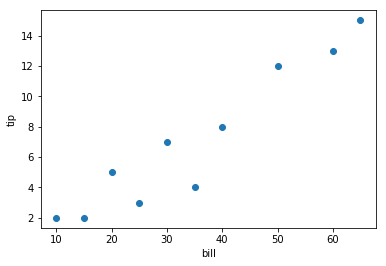

In [4]:
plt.scatter(tip_data.bill, tip_data.tip)
plt.ylabel('tip')
plt.xlabel('bill')
plt.show()

In [33]:
x = tip_data['bill'].values
y = tip_data['tip'].values
print('bill = ' + str(x))
print('tip = ' + str(y))

bill = [ 50.  30.  60.  40.  65.  20.  10.  15.  25.  35.]
tip = [ 12.   7.  13.   8.  15.   5.   2.   2.   3.   4.]



## Step 4: Run Linear Regression in Keras

Let's run our linear regression.  To do this we need to run call the LinearRegression Classs

In [56]:
import keras
from keras.layers import Input, Dense
from keras.models import Model, Sequential

inputs = Input(shape=(1,))
preds = Dense(1,activation='linear')(inputs)

model = Model(inputs=inputs,outputs=preds)
sgd=keras.optimizers.SGD( lr=0.0001)
model.compile(optimizer=sgd ,loss='mse')
model.fit(x,y, batch_size=10, verbose=1, epochs=100)

Epoch 1/100
10/10 [==============================] - 0s 19ms/step - loss: 2.3327
Epoch 2/100
10/10 [==============================] - 0s 140us/step - loss: 2.3221
Epoch 3/100
10/10 [==============================] - 0s 247us/step - loss: 2.3170
Epoch 4/100
10/10 [==============================] - 0s 239us/step - loss: 2.3145
Epoch 5/100
10/10 [==============================] - 0s 637us/step - loss: 2.3133
Epoch 6/100
10/10 [==============================] - 0s 268us/step - loss: 2.3127
Epoch 7/100
10/10 [==============================] - 0s 338us/step - loss: 2.3124
Epoch 8/100
10/10 [==============================] - 0s 692us/step - loss: 2.3123
Epoch 9/100
10/10 [==============================] - 0s 291us/step - loss: 2.3122
Epoch 10/100
10/10 [==============================] - 0s 498us/step - loss: 2.3121
Epoch 11/100
10/10 [==============================] - 0s 214us/step - loss: 2.3121
Epoch 12/100
10/10 [==============================] - 0s 190us/step - loss: 2.3120
Epoch 13/100
1

Epoch 100/100
10/10 [==============================] - 0s 262us/step - loss: 2.3092


In [57]:
model.predict(tip_data[['bill']].values)

array([[ 10.55250549],
       [  6.32925081],
       [ 12.66413212],
       [  8.44087791],
       [ 13.71994591],
       [  4.21762371],
       [  2.10599661],
       [  3.16181016],
       [  5.2734375 ],
       [  7.3850646 ]], dtype=float32)

In [60]:
weights, bias = model.layers[1].get_weights()
a = slope = weights[0][0]
b = intercept = bias[0]
print(a,b)

0.211163 -0.0056306


## Step 7: Plot the fit line (abline)

**=>TODO: Do a scatterplot of bill versus tip **

In [ ]:
# Create a list of values in the best fit line
# TODO: Fill in gradient and intercept in formula
abline_values = [??? * i + ??? for i in tip_data.bill]

# Plot the best fit line over the actual values
plt.scatter(tip_data.bill, tip_data.tip)
plt.plot(tip_data.bill, abline_values, 'b')
plt.ylabel('tip')
plt.xlabel('bill')
plt.title("Fit Line")
plt.show()

In [ ]:
# Make a prediction using the slope and the intercept
y_pred = tip_data.bill.values.reshape(10,1)
y_test = tip_data.tip.values.reshape(10,1)




## Step 8: Print out the Outputs

Here is a sample output:

## Step 9: Plot the residuals

Residuals are the error, or difference between the model predicted and model actual.  We'd like these to be as small as possible, with residuals roughly balanced.   We don't want a model that consistently predicts values too high or too low.

**=>TODO: do a plot of the bill (x-value) versus residuals (y-value) **

In [ ]:
resid = (??? * tip_data.bill + ???) - tip_data.tip

In [ ]:
plt.scatter(tip_data.bill, resid)
plt.axhline(y=0, color='r', linestyle='-')  # horizon
plt.ylabel('Residuals')
plt.xlabel('bill')
plt.title("Residuals")
plt.show()




## Step 10 : Identify Coefficients

### Intercept and Slope
We can see them from output

Coefficients:
            Estimate 
(Intercept) -0.8217112049846651
bill        0.226334605857

- **Slope** (of line) : ** 0.226334605857**
- **Intercept** (where line meets Y-axis) : **-0.8217112049846651**  (below zero line)

We can also get these programatically.  
If `tip = a * amount + b`

In [ ]:

# Print the coefficients and intercept for linear regression
print("Coefficients: %s" % str(slope))
print("Intercept: %s" % str(intercept))

a = slope
b = intercept


**==>  Question : Does bill amount influence tip amount? (are they strongly linked?) **




### TODO: Calcluate Tip for 100 bill.

In [ ]:
tip_for_100 = ??? * 100 + ??? 
print(tip_for_100)


## Step 12: Add a estimated_tip column to pandas dataframe

**=>TODO: create a new pandas column called est_tip **

In [ ]:
tip_data['est_tip'] =  ???
tip_data

## Step 13: Perform a prediction


Let's try to run a prediction on some data: $45.00, $55.00, and $65.00 


**=>TODO: use model to transform dataframe with feature vectors to make predictions **

In [ ]:
test_data_pd = pd.DataFrame({'bill' : [45., 55., 65.,]
             })

test_data_pd['predicted_tip'] = result.predict(test_data_pd)



test_data_pd